**Проект: использование средств Python для расчёта и визуализации статистических свойств выборки**

Выборка — задача многоклассовой классификации [ирисов Фишера](https://).

In [88]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [89]:
iris = datasets.load_iris()

In [90]:
dataset = iris['data']

In [91]:
target = iris['target']

In [92]:
X = pd.DataFrame(dataset, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [93]:
y = pd.DataFrame(target, columns=['species'])
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [94]:
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


1. Посчитать основные характеристики выборки по каждому признаку:
- среднее;
- дисперсия;
- минимум;
- максимум;
- размах.

In [95]:
features_st = pd.DataFrame(index=X.columns, columns=['среднее', 'дисперсия', 'минимум', 'максимум', 'размах'])
for col in X.columns:
  features_st.loc[col]['среднее'] = round(X[col].mean(), 2)
  features_st.loc[col]['дисперсия'] = round(X[col].var(), 2)
  features_st.loc[col]['минимум'] = X[col].min()
  features_st.loc[col]['максимум'] = X[col].max()
  features_st.loc[col]['размах'] = X[col].max() - X[col].min()
features_st

,среднее,дисперсия,минимум,максимум,размах
sepal length (cm),5.84,0.69,4.3,7.9,3.6
sepal width (cm),3.06,0.19,2.0,4.4,2.4
petal length (cm),3.76,3.12,1.0,6.9,5.9
petal width (cm),1.2,0.58,0.1,2.5,2.4


2. Визуализировать распределения признаков посредством seaborn.

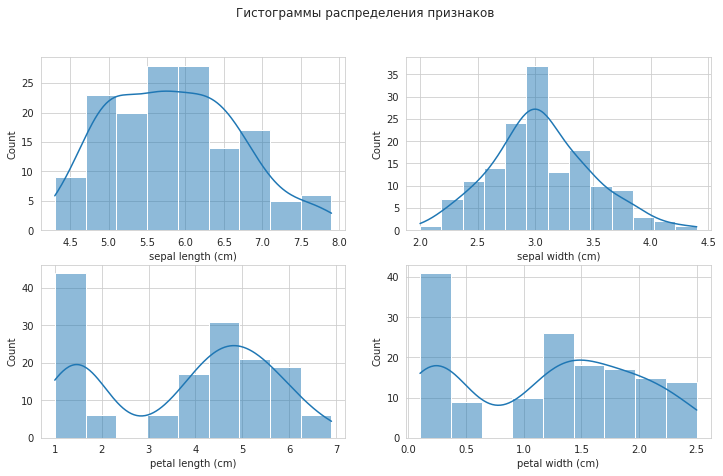

In [96]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(12, 7))
plt.suptitle('Гистограммы распределения признаков')

sns.histplot(ax=ax[0, 0], data=X, x='sepal length (cm)', kde=True)
sns.histplot(ax=ax[0, 1], data=X, x='sepal width (cm)', kde=True)
sns.histplot(ax=ax[1, 0], data=X, x='petal length (cm)', kde=True)
sns.histplot(ax=ax[1, 1], data=X, x='petal width (cm)', kde=True)
plt.show()

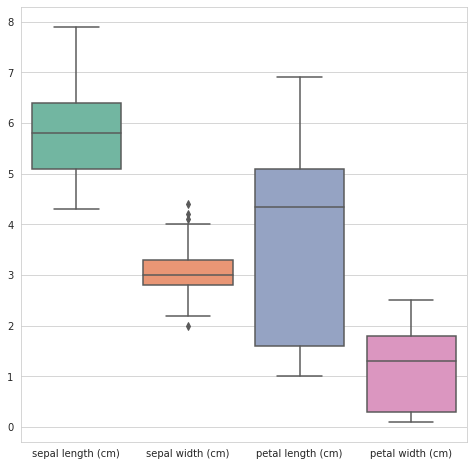

In [109]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=X, palette='Set2')
plt.show()

3. Посчитать и визуализировать корреляционную матрицу.

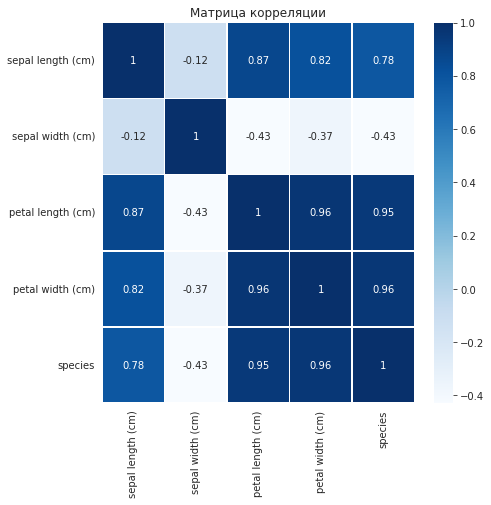

In [98]:
corr = df.corr()
plt.figure(figsize=(7, 7))
plt.title('Матрица корреляции')
sns.heatmap(data=corr, annot=True, cbar=True, linewidths=0.5, cmap='Blues')
plt.show()

4. Проверить гипотезу о нормальности распределения для признаков 1 и 2.

In [99]:
def shapiro_test(x, alpha):
  statistic, p_value = stats.shapiro(x)
  print(f'statistic = {statistic}, p-value={p_value}')
  return p_value > alpha

In [100]:
shapiro_test(df['sepal length (cm)'], 0.05)

statistic = 0.9760897755622864, p-value=0.01017984002828598


False

In [101]:
shapiro_test(df['sepal width (cm)'], 0.05)

statistic = 0.9849170446395874, p-value=0.10113201290369034


True

5. Произвести расчёт статистик из пункта 1 для каждого значения таргета (группировка).

In [102]:
df.groupby('species').mean().set_index(iris.target_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [103]:
df.groupby('species').var().set_index(iris.target_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [104]:
df_min = df.groupby('species').min().set_index(iris.target_names)
df_min

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [105]:
df_max = df.groupby('species').max().set_index(iris.target_names)
df_max

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [106]:
feat_range = df_max.values - df_min.values
df_range = pd.DataFrame(feat_range, index=iris.target_names, columns=X.columns)
df_range

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


6. Написать функцию, автоматизирующую EDA.

In [110]:
def EDA(data):

  dataset = iris['data']
  target = iris['target']
  X = pd.DataFrame(dataset, columns=iris.feature_names)
  df = pd.concat([X, y], axis=1)

  features_st = pd.DataFrame(index=X.columns, columns=['среднее', 'дисперсия', 'минимум', 'максимум', 'размах'])
  for col in X.columns:
     features_st.loc[col]['среднее'] = round(X[col].mean(), 2)
     features_st.loc[col]['дисперсия'] = round(X[col].var(), 2)
     features_st.loc[col]['минимум'] = X[col].min()
     features_st.loc[col]['максимум'] = X[col].max()
     features_st.loc[col]['размах'] = X[col].max() - X[col].min()
  print(features_st)
   
  sns.set_style('whitegrid')
  fig, ax = plt.subplots(2, 2, figsize=(12, 7))
  plt.suptitle('Гистограммы распределения признаков')

  sns.histplot(ax=ax[0, 0], data=X, x='sepal length (cm)', kde=True)
  sns.histplot(ax=ax[0, 1], data=X, x='sepal width (cm)', kde=True)
  sns.histplot(ax=ax[1, 0], data=X, x='petal length (cm)', kde=True)
  sns.histplot(ax=ax[1, 1], data=X, x='petal width (cm)', kde=True)
  plt.show()

  plt.figure(figsize=(8, 8))
  sns.boxplot(data=X, palette='Set2')
  plt.show()

  corr = df.corr()
  plt.figure(figsize=(7, 7))
  plt.title('Матрица корреляции')
  sns.heatmap(data=corr, annot=True, cbar=True, linewidths=0.5, cmap='Blues')
  plt.show()

  def shapiro_test(x, alpha):
     statistic, p_value = stats.shapiro(x)
     print(f'statistic = {statistic}, p-value={p_value}')
     return p_value > alpha

  print(shapiro_test(df['sepal length (cm)'], 0.05))
  print(shapiro_test(df['sepal width (cm)'], 0.05))

  print(df.groupby('species').mean().set_index(iris.target_names))
  print(df.groupby('species').var().set_index(iris.target_names))
  df_min = df.groupby('species').min().set_index(iris.target_names)
  print(df_min)

  df_max = df.groupby('species').max().set_index(iris.target_names)
  print(df_max)

  feat_range = df_max.values - df_min.values
  df_range = pd.DataFrame(feat_range, index=iris.target_names, columns=X.columns)
  print(df_range)

7. Описать основные выводы по каждому разделу проекта. Какие выводы можно сделать на основе проведённого анализа?

- значения признака *petal length (cm)* расбросаны в довольно большом интервале по сравнению с другими признаками. Об этом говорят значения дисперсии и размаха
- значения размаха для признаков *petal width (cm)*	и *sepal width (cm)*
- наиболее сильно скореллированы признаки *petal length* - *sepal length*, *petal width* - *sepal length*, *petal width* - *petal length*
- признаки *petal width* и *petal length* сильно скореллированы с целевой переменной
- тест Шапиро-Уилка показал, что признак *sepal length* не имеет нормального распределения, а признак *sepal width* рапредлён нормально